## Introduction: 
Netflix is a American subscription streaming service and proudtion company, it was launched in 1997 and initially use to do destrubution deal
Netflix is located in Los Gatos, California. Netflix was the first company to do video on demand via Internet or streaming.


##Data Source:
The source of our data is : https://www.kaggle.com/datasets/shivamb/netflix-shows

Here we are importing all the necessary libraries:




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Reading the data from the Netflix_title CSV file.

In [2]:
data=pd.read_csv("netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
data['date_added'] = pd.to_datetime(data["date_added"].astype(str), format = "%B %d, %Y",errors="coerce")
#date = datetime.strptime(date, '%d/%m/%Y')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


From the above command, we get following information:


1.   There are 12 features in our data set
2.   The director features is missing lots of values
3.   Release year is the only integer data type



In [5]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        98
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

inorder to get the number of nullvalues the end od the command as can we see director has higest number of missing values
 

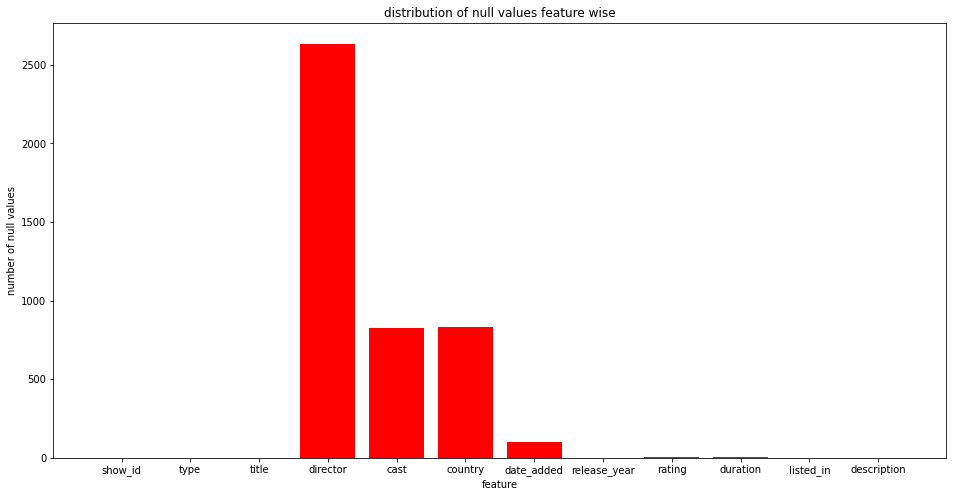

In [6]:
ind = np.arange(12) # the x locations for the groups
plt.figure(figsize=(16,8))
plt.bar(data.columns,data.isnull().sum(),color='r')
plt.xlabel("feature")
plt.ylabel("number of null values")
plt.title("distribution of null values feature wise")
plt.show()


We want to see compare difference  between Movie data and TV Shows data, so we creat a new data frames with just data consisting of movies "data_movies" and other consisting of tv shows "data_tvShow".

In [7]:
data_movies = data.loc[data['type'] == 'Movie']
data_tvShow = data.loc[data['type'] == 'TV Show']
data_movies.head(10)
data_tvShow.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B..."
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,2021-09-23,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,2021-09-22,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries",Cameras following Bengaluru police on the job ...
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...


Since we already clear the movie data and the tv show data, we don't need the type column, so we will drop it. 

In [8]:
#data_movies=data_movies.drop(columns=['type'],axis = 1)
#data_tvShow=data_tvShow.drop(columns=['type'],axis = 1)
#data_movies.head(10)
#data_tvShow.head(10)

From the listed column we are creating a new column call genre.

In [9]:
data_tvShow['genre'] = data_tvShow['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')[0])
data_movies['genre'] = data_movies['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')[0])

#data_tvShow['firstcountry'] = data_tvShow['country'].apply(lambda y :  y.replace(' ,',',').replace(', ',',').split(','))
#data_movies['firstcountry'] = data_movies['country'].apply(lambda y :  y.replace(' ,',',').replace(', ',',').split(','))
#data_movies.head(10)
#data_tvShow.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
data_movies.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Children & Family Movies
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Dramas
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Comedies
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Dramas
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...,Children & Family Movies
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN,NaN,2021-09-22,2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...,Documentaries
18,s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh...",NaN,2021-09-22,2021,TV-14,94 min,Thrillers,After a deadly home invasion at a couple’s new...,Thrillers
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,2021-09-21,1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,Comedies
23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ...",NaN,2021-09-21,2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...,Children & Family Movies


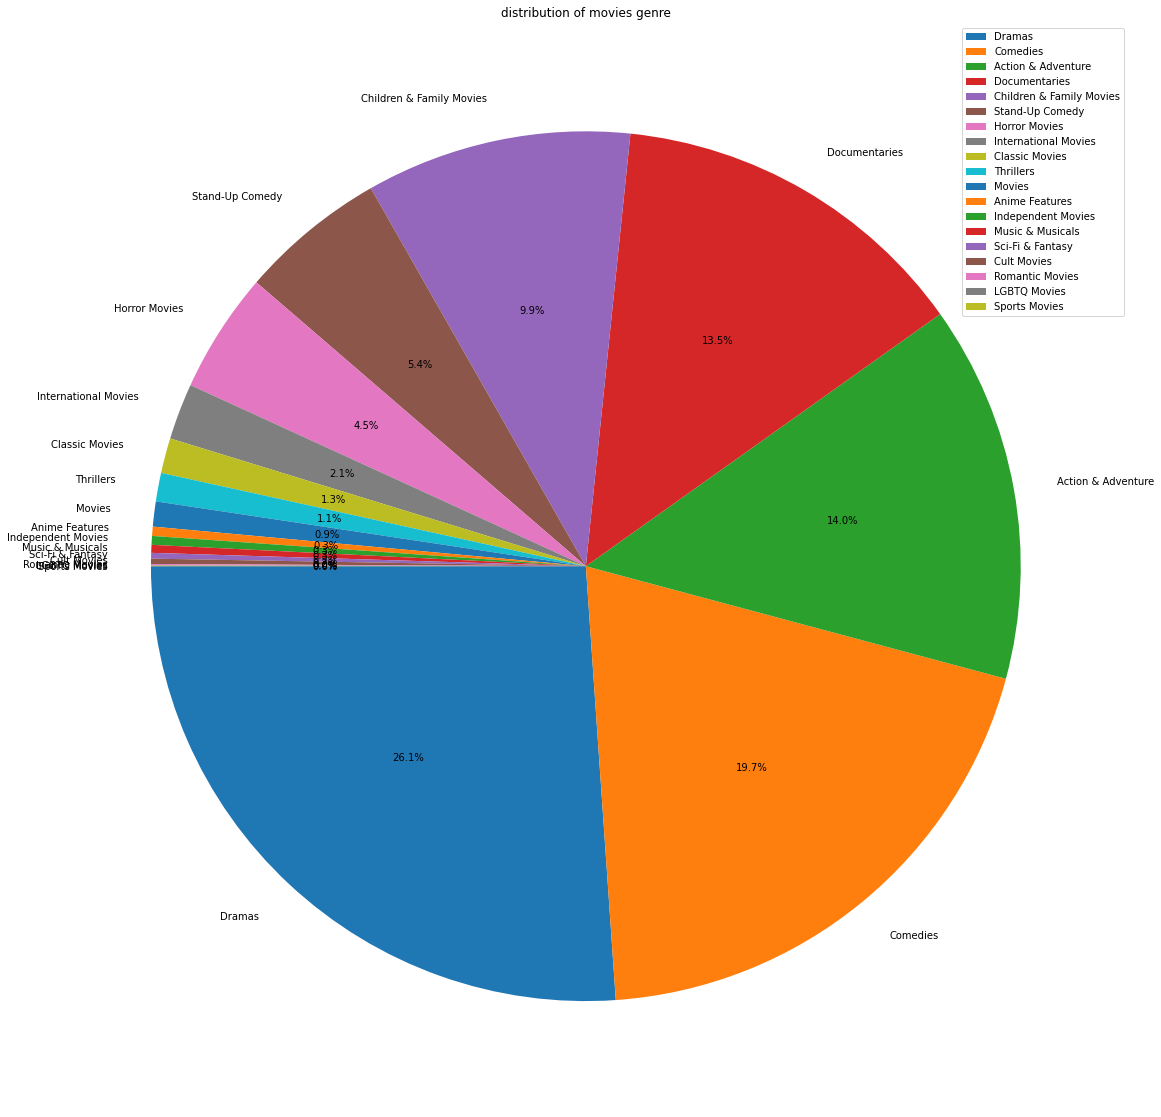

In [11]:
plt.figure(figsize=(25,20))
plt.title("distribution of movies genre")
g = plt.pie(data_movies.genre.value_counts(), labels=data_movies.genre.value_counts().index,autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

##Observations

1.   largest precentage of movies are listed under genre drama(26.1%)  
2.   Second largest precentage of movies are listed under gnere comedies (19.7%)
3.   Dramas, comedies, action and adventure are the most popular genre of movies.



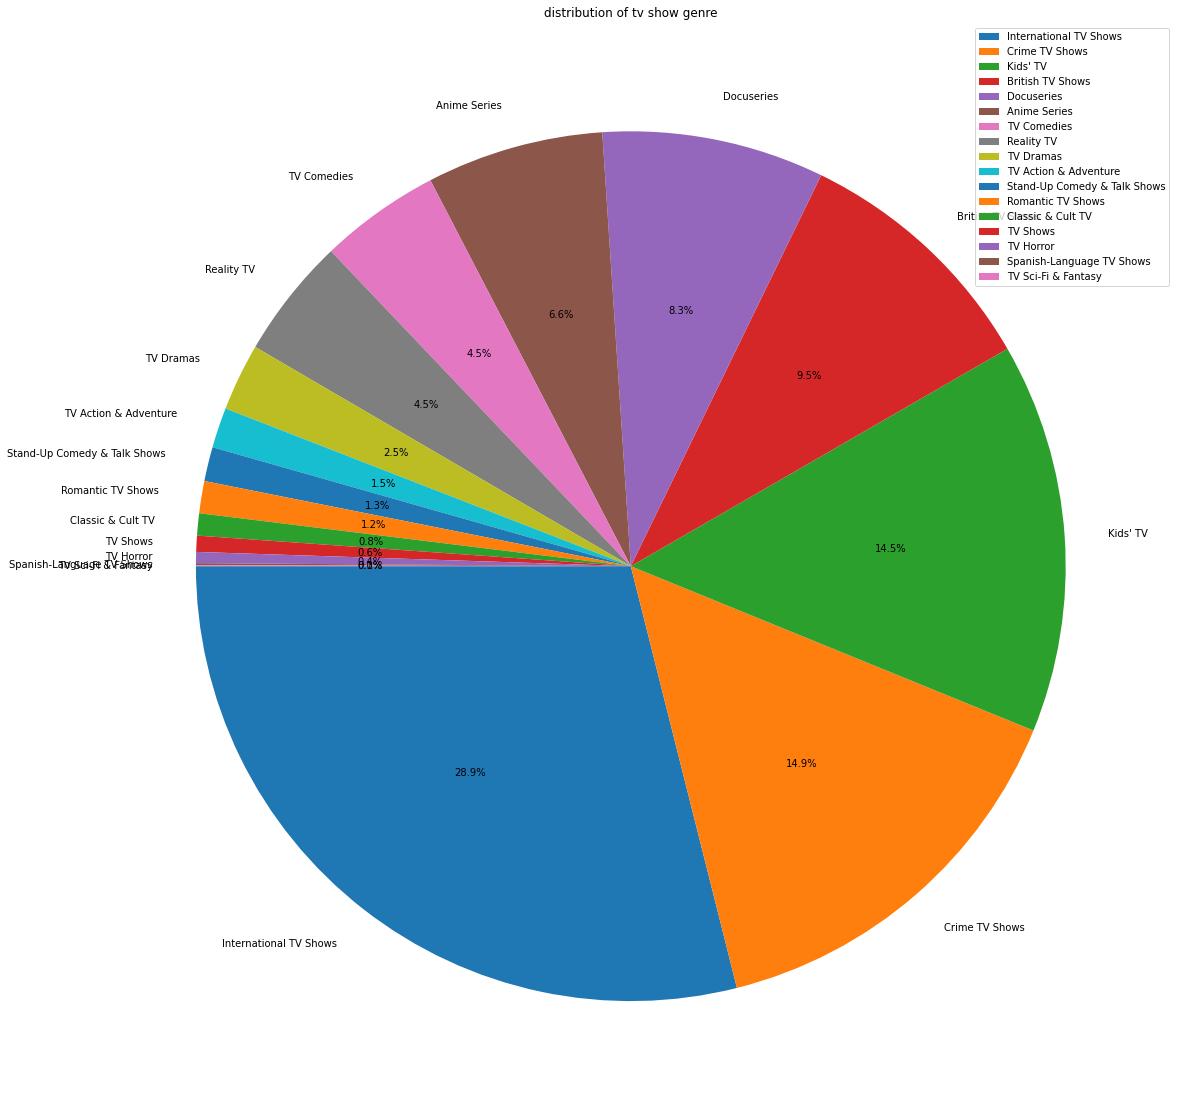

In [12]:
plt.figure(figsize=(30,20))
plt.title("distribution of tv show genre")
g = plt.pie(data_tvShow.genre.value_counts(), labels=data_tvShow.genre.value_counts().index,autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

##Observations:


1.   Largest precentage of TV shows are International TV Shows(28.9%)
2.   Second largest precentage of TV shows are crime TV shows(14.9%)
3.   International TV shows, Crime TV shoes, Kids' TV shows are the most popular genre of TV shows.
 personal I like to watch K drama which belong to Internation TV shows, no doubt they are popular.


In [13]:
data_movies['month_added'] = data_movies['date_added'].dt.month.fillna(0)
data_tvShow['month_added'] = data_tvShow['date_added'].dt.month.fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
data_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries,9
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Children & Family Movies,9
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Dramas,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,Comedies,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,Dramas,9


(array([546., 382., 529., 550., 439., 492., 565., 519., 519., 545., 498.,
        547.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <a list of 12 Patch objects>)

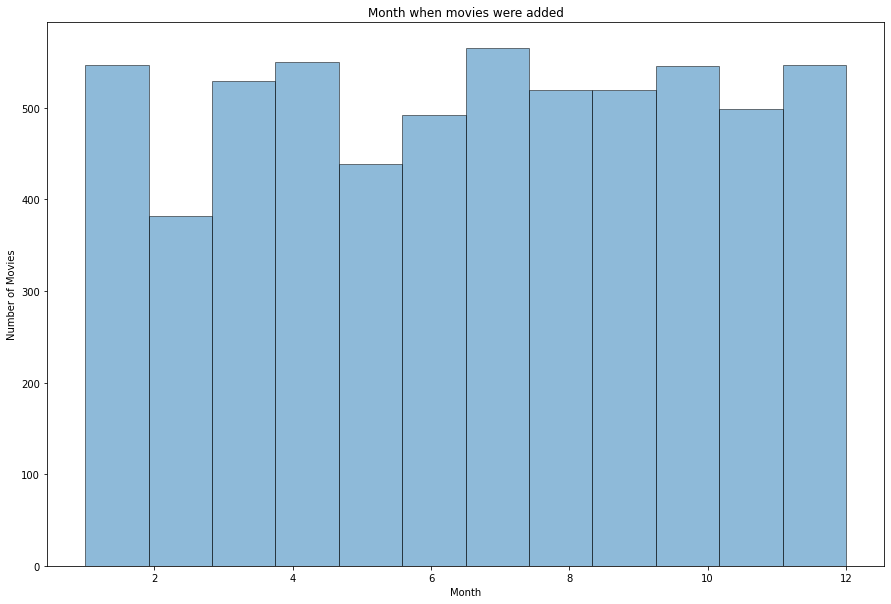

In [15]:
plt.figure(figsize=(15,10))
plt.title("Month when movies were added")
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.hist(data_movies['month_added'], histtype= 'bar', ec='black', alpha = .5, bins = 12)

##Observation:
1.   July has most of the movies added to netflix
2.   February has the least of movies added to netflix



(array([ 98., 181., 175., 205., 209., 187., 232., 254., 230., 246., 210.,
        449.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <a list of 12 Patch objects>)

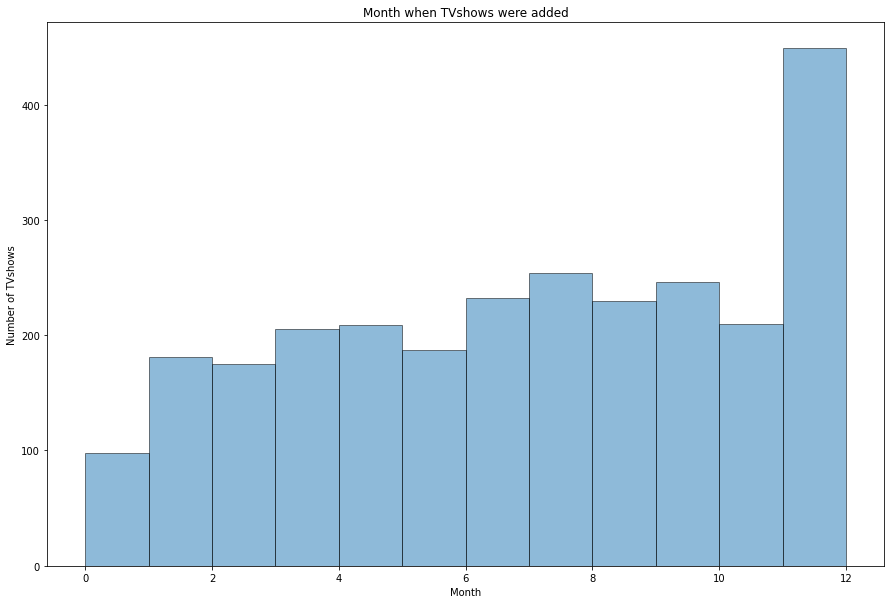

In [16]:
plt.figure(figsize=(15,10))
plt.title("Month when TVshows were added")
plt.xlabel('Month')
plt.ylabel('Number of TVshows')
plt.hist(data_tvShow['month_added'], histtype= 'bar', ec='black', alpha = .5, bins = 12)

##Observation:
1.   December has the most TVshows added to netflix
2.   January has the least TVshows added to netflix


We know the detail about the release year, we would get detail about year added and compare and plot those. 

In [17]:
data_movies['year_added'] = data_movies['date_added'].dt.year.fillna(0)
data_tvShow['year_added'] = data_tvShow['date_added'].dt.year.fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([3.000e+00, 1.000e+00, 1.300e+01, 3.000e+00, 6.000e+00, 1.900e+01,
        5.600e+01, 2.530e+02, 8.390e+02, 1.237e+03, 1.424e+03, 2.277e+03]),
 array([2008.        , 2009.08333333, 2010.16666667, 2011.25      ,
        2012.33333333, 2013.41666667, 2014.5       , 2015.58333333,
        2016.66666667, 2017.75      , 2018.83333333, 2019.91666667,
        2021.        ]),
 <a list of 12 Patch objects>)

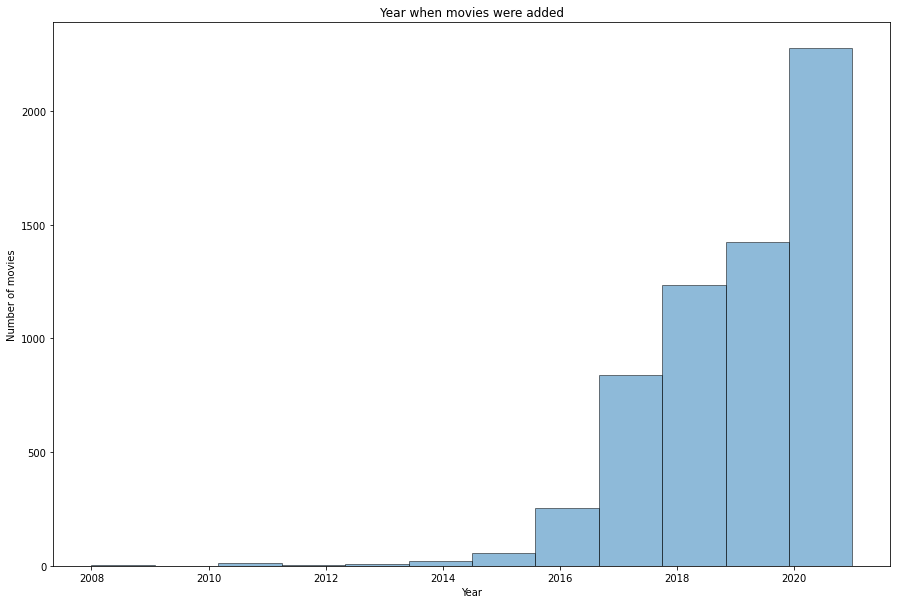

In [18]:
plt.figure(figsize=(15,10))
plt.title("Year when movies were added")
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.hist(data_movies['year_added'], histtype= 'bar', ec='black', alpha = .5, bins = 12)

In [19]:
data_tvShow= data_tvShow.replace(0.0, 2008)

(array([  99.,    0.,    0.,    0.,    4.,    4.,   17.,  165.,  325.,
         388.,  575., 1099.]),
 array([2008.        , 2009.08333333, 2010.16666667, 2011.25      ,
        2012.33333333, 2013.41666667, 2014.5       , 2015.58333333,
        2016.66666667, 2017.75      , 2018.83333333, 2019.91666667,
        2021.        ]),
 <a list of 12 Patch objects>)

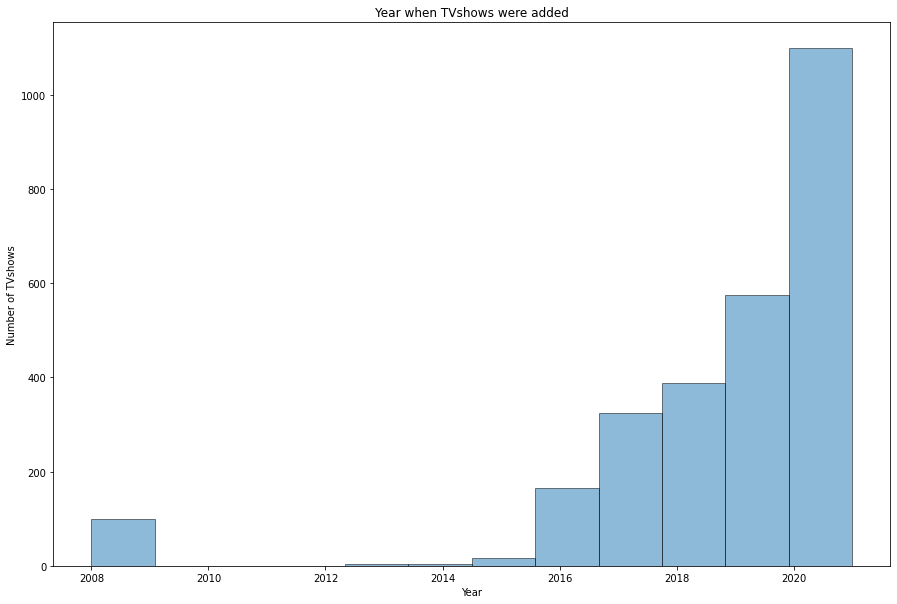

In [20]:
plt.figure(figsize=(15,10))
plt.title("Year when TVshows were added")
plt.xlabel('Year')
plt.ylabel('Number of TVshows')
plt.hist(data_tvShow['year_added'], histtype= 'bar', ec='black', alpha = .5, bins = 12)

##Observation:
1.   Most of the TVshows were added in year 2020
2.   TV shows start to be added to Netflix since 2008
3.   Since 2016 the number of TVshows have been increasing exponentially
1.   Most of the movies were added in year 2020
2.   Movie start to be added to Netflix since 2008
3.   Since 2016 the number of movies have been increasing exponentially
Since 2016 Netflix start huge growth in viewer base which seems to be co reladed with the number of titles(movie&TVshows) added on the platform


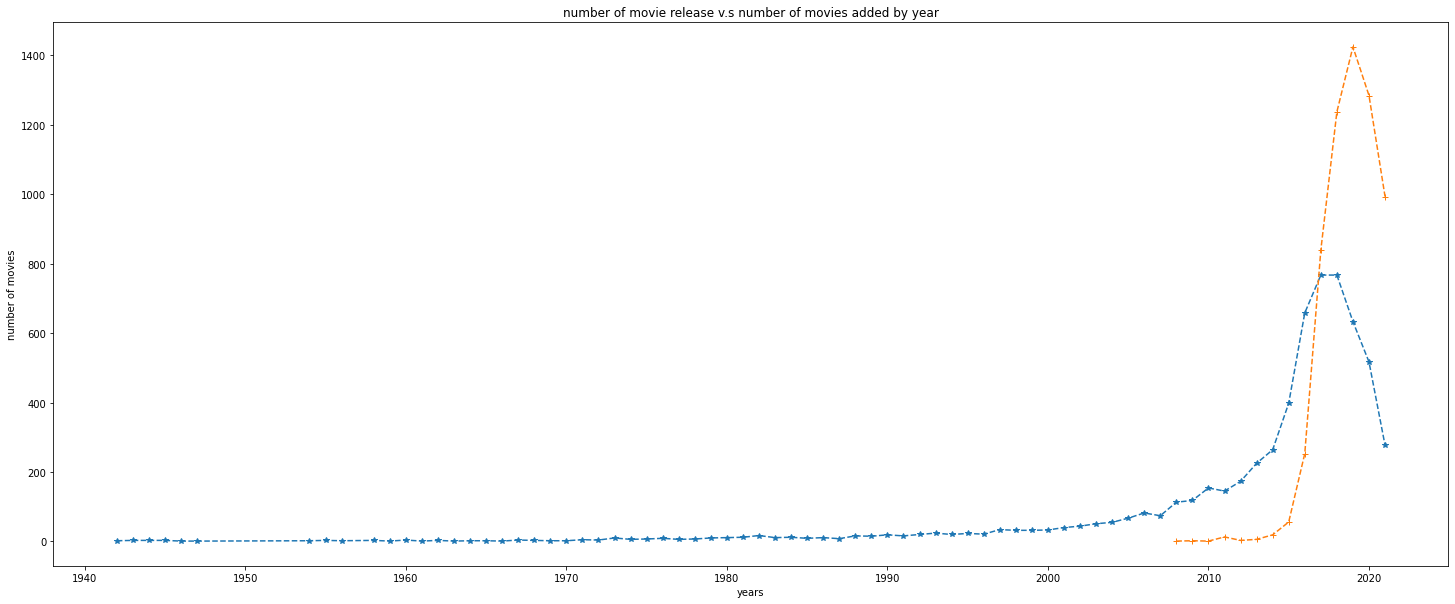

In [21]:
rl_mv_yr= data_movies.groupby(['release_year']).size()
ad_mv_yr= data_movies.groupby(['year_added']).size()
plt.figure(figsize=(25,10))
plt.plot(rl_mv_yr,'*--')
#plt.text(data_movies['release_year'],data_movies['release_year'].value_counts(),fontsize=20)
plt.plot(ad_mv_yr,'+--')
#plt.text(data_movies['year_added'],data_movies['year_added'].value_counts(),fontsize=20)
plt.xlabel("years")
plt.ylabel("number of movies")
plt.title("number of movie release v.s number of movies added by year")
plt.show()

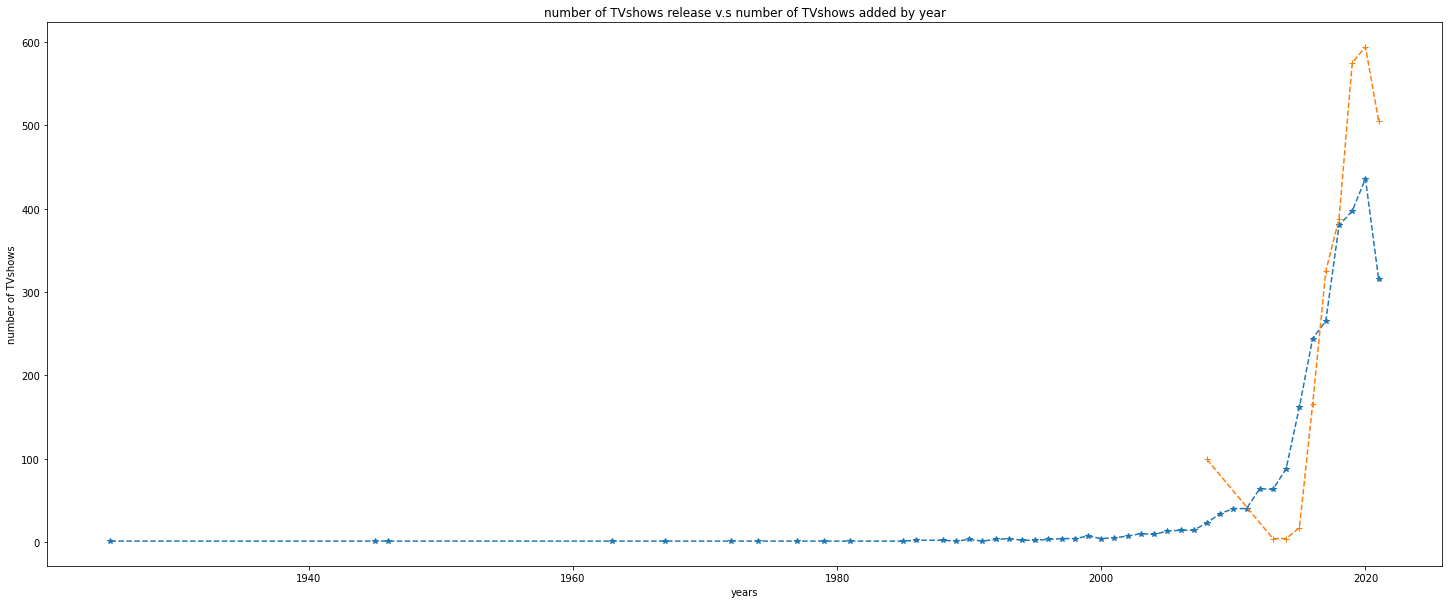

In [22]:
rl_tvshow_yr= data_tvShow.groupby(['release_year']).size()
ad_tvshow_yr= data_tvShow.groupby(['year_added']).size()
plt.figure(figsize=(25,10))
plt.plot(rl_tvshow_yr,'*--')
#plt.text(data_movies['release_year'],data_movies['release_year'].value_counts(),fontsize=20)
plt.plot(ad_tvshow_yr,'+--')
#plt.text(data_movies['year_added'],data_movies['year_added'].value_counts(),fontsize=20)
plt.xlabel("years")
plt.ylabel("number of TVshows")
plt.title("number of TVshows release v.s number of TVshows added by year")
plt.show()

##Oberservation:
1.   Movie start release around year 1943, start added to netflix around 1997
2.   Most of the movie were added to netflix during 2018-2020
3.   Most of the movie were make during year 2018-2020
1.   TVshows start release around year 1920, start added to netflix around 2008
2.   Most of the TVshows were added to netflix during 2019-2020 
3.   Most of the TVshows were make during year 2020




In [23]:
print(type(ad_mv_yr))
print(rl_mv_yr)

<class 'pandas.core.series.Series'>
release_year
1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    767
2018    767
2019    633
2020    517
2021    277
Length: 73, dtype: int64


We would like to understand how many years does it take for a movie or a TV show to be added to Netflix after it has been released.

Approach: we would create a new columm that is based on differece between year added and release year.  

In [24]:
data_tvShow['diff_year'] = data_tvShow['year_added']-data_tvShow['release_year']
data_movies['diff_year'] = data_movies['year_added']-data_movies['release_year']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
data_tvShow['diff_year'].value_counts()

 0.0     1361
 1.0      381
 2.0      216
 3.0      139
 4.0       85
 5.0       71
 6.0       66
 7.0       44
 8.0       36
 9.0       32
-8.0       24
 10.0      18
 11.0      16
-9.0       16
 14.0      13
 13.0      12
 15.0      11
-1.0       11
-7.0       11
-6.0        9
 12.0       9
 16.0       9
-4.0        8
 18.0       8
-10.0       7
-5.0        6
 17.0       6
-2.0        5
 21.0       5
 19.0       5
 27.0       5
 20.0       5
 25.0       2
 22.0       2
 24.0       2
-3.0        2
 29.0       2
 31.0       2
 41.0       1
 26.0       1
 33.0       1
 71.0       1
 37.0       1
 34.0       1
 38.0       1
 93.0       1
 28.0       1
 76.0       1
 23.0       1
 44.0       1
 46.0       1
 54.0       1
Name: diff_year, dtype: int64

In [26]:
data_movies['diff_year'].value_counts()

0     1862
1     1178
2      491
3      347
4      273
      ... 
60       1
63       1
71       1
70       1
50       1
Name: diff_year, Length: 71, dtype: int64

In [27]:
data_tvShow[data_tvShow['diff_year']<0]
data_tvShow.drop(data_tvShow[data_tvShow['diff_year'] < 0.0].index, inplace = True)
data_tvShow[data_tvShow['diff_year']<0]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,month_added,year_added,diff_year


In [28]:
data_tvShow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2577 entries, 1 to 8803
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       2577 non-null   object        
 1   type          2577 non-null   object        
 2   title         2577 non-null   object        
 3   director      224 non-null    object        
 4   cast          2235 non-null   object        
 5   country       2190 non-null   object        
 6   date_added    2566 non-null   datetime64[ns]
 7   release_year  2577 non-null   int64         
 8   rating        2575 non-null   object        
 9   duration      2577 non-null   object        
 10  listed_in     2577 non-null   object        
 11  description   2577 non-null   object        
 12  genre         2577 non-null   object        
 13  month_added   2577 non-null   float64       
 14  year_added    2577 non-null   float64       
 15  diff_year     2577 non-null   float64 

(array([2.182e+03, 2.490e+02, 5.500e+01, 4.700e+01, 1.800e+01, 1.000e+01,
        5.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0.  ,  4.65,  9.3 , 13.95, 18.6 , 23.25, 27.9 , 32.55, 37.2 ,
        41.85, 46.5 , 51.15, 55.8 , 60.45, 65.1 , 69.75, 74.4 , 79.05,
        83.7 , 88.35, 93.  ]),
 <a list of 20 Patch objects>)

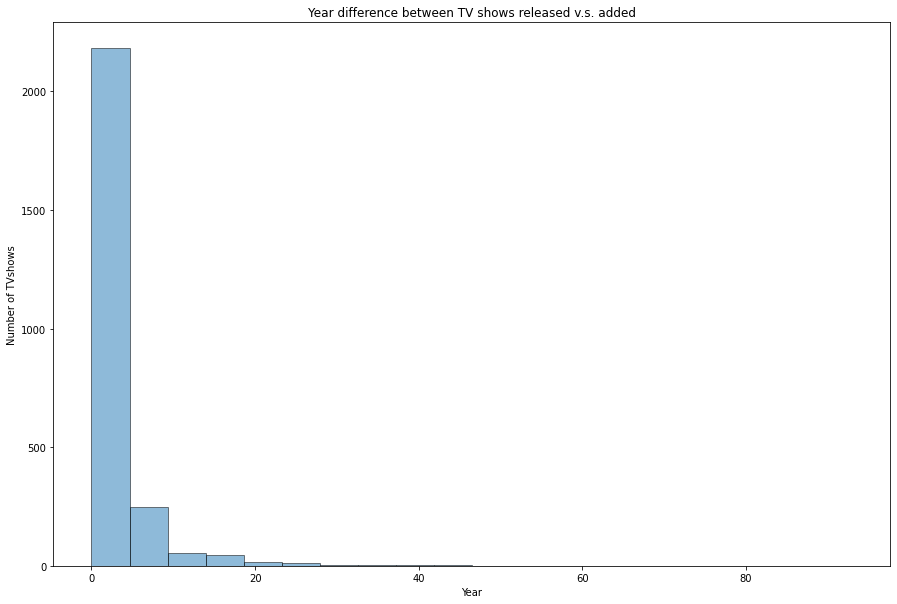

In [29]:
plt.figure(figsize=(15,10))
plt.title("Year difference between TV shows released v.s. added")
plt.xlabel('Year')
plt.ylabel('Number of TVshows')
plt.hist(data_tvShow['diff_year'], histtype= 'bar', ec='black', alpha = .5, bins = 20)

In [30]:
data_tvShow['diff_year'].value_counts()

0.0     1361
1.0      381
2.0      216
3.0      139
4.0       85
5.0       71
6.0       66
7.0       44
8.0       36
9.0       32
10.0      18
11.0      16
14.0      13
13.0      12
15.0      11
16.0       9
12.0       9
18.0       8
17.0       6
27.0       5
21.0       5
19.0       5
20.0       5
24.0       2
31.0       2
29.0       2
22.0       2
25.0       2
41.0       1
26.0       1
33.0       1
71.0       1
37.0       1
38.0       1
28.0       1
23.0       1
44.0       1
46.0       1
93.0       1
34.0       1
76.0       1
54.0       1
Name: diff_year, dtype: int64

##Observation 
1.   About 80% of TV shows were added to Netflix the same year or in three years as it released
2.   There is at least one TV shows were added to Netflix after 50 years when it released




(array([4344.,  831.,  382.,  243.,  113.,   62.,   76.,   33.,   14.,
          13.,    7.,   13.]),
 array([-1.        ,  5.33333333, 11.66666667, 18.        , 24.33333333,
        30.66666667, 37.        , 43.33333333, 49.66666667, 56.        ,
        62.33333333, 68.66666667, 75.        ]),
 <a list of 12 Patch objects>)

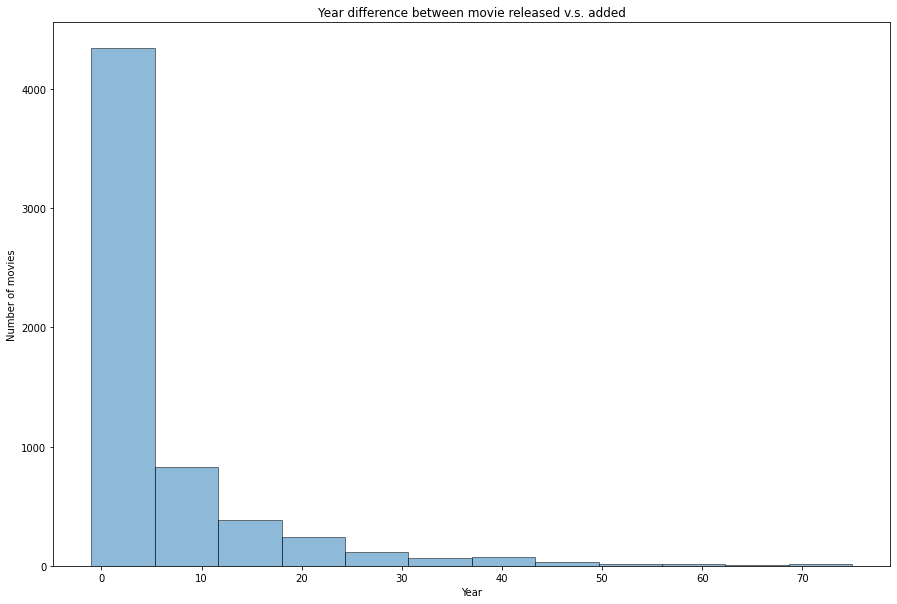

In [31]:
plt.figure(figsize=(15,10))
plt.title("Year difference between movie released v.s. added")
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.hist(data_movies['diff_year'], histtype= 'bar', ec='black', alpha = .5, bins = 12)

##Observation:
1.  About 80% of movies were added to Netflix the same year or in five years as it released
2.  There is at least one movie were added to Netflix after 75 years when it released 

##Summarization & Conclusion:
1.   Netflix contain 70% movie and 30% TV shows
2.   Netflix contain titles which has TV-MA rating the most
3.   Comedy and action genre are most popular genre in movies
4.   Netflix has major content catering adults.

This are few summarization after analysis we reached up on.

##Future scope
We could further draw conclusions about the Genres, like genre labellings, distribution of titles based on Country  and many other details, if we clean up the data and make it more understandable.  

